# scDataset Benchmark Plots

This notebook generates plots for the scDataset paper.
The plots visualize throughput and minibatch entropy analysis from benchmark experiments.

In [1]:
import os
import sys

# Ensure we're in the benchmarks directory
os.chdir(os.path.dirname(os.path.abspath('__file__')))

from plot_utils import (
    plot_throughput,
    plot_batch_entropy,
    plot_block_size_by_fetch_factor,
    plot_tradeoff,
    plot_tradeoff_scatter,
    plot_streaming_comparison,
    generate_all_benchmark_plots,
)

## 1. scDataset Throughput with AnnData

This plot shows the throughput (samples/second) of scDataset using AnnCollection
compared to the baseline AnnLoader with random sampling.

Figure saved to figures/throughput_anndata.pdf


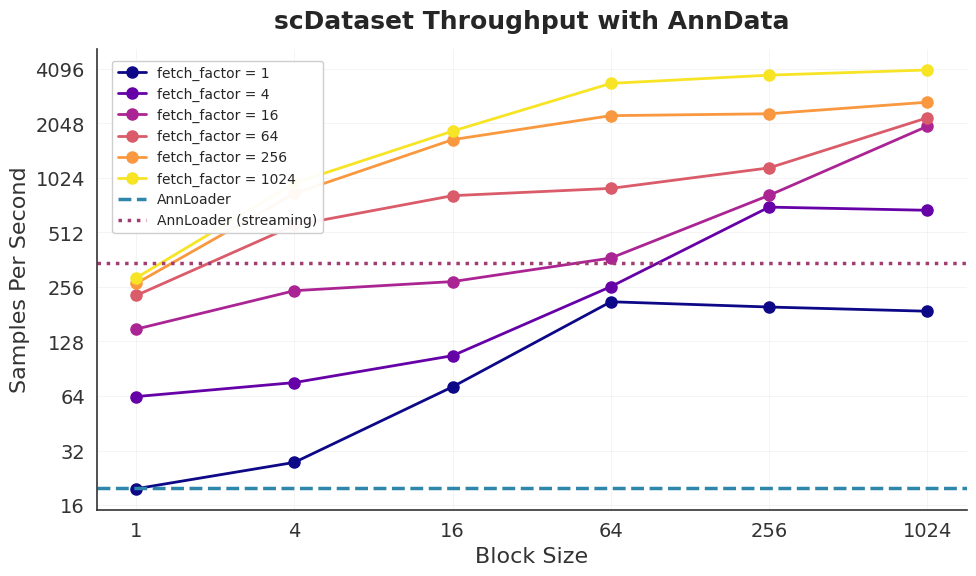

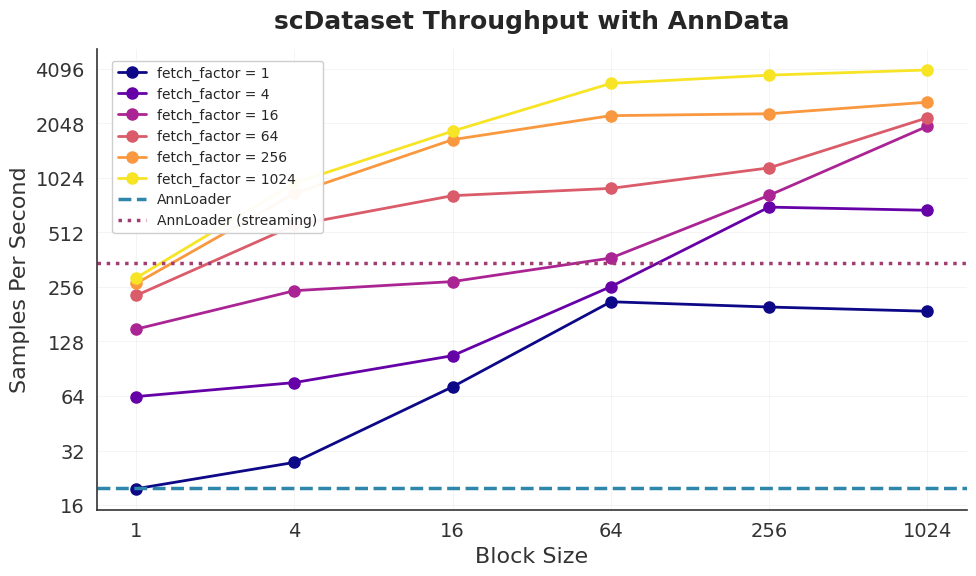

In [13]:
plot_throughput(
    csv_path='experiments/block_size_fetch_factor_eval_anncollection_random.csv',
    title='scDataset Throughput with AnnData',
    y_log_scale=True,
    x_log_scale=True,
    color_map='plasma',
    # baseline_label auto-detected as "AnnLoader" based on collection_type
    save_path='figures/throughput_anndata.pdf',
)

## 2. scDataset Throughput with HuggingFace

This plot shows the throughput of scDataset using HuggingFace Datasets
(Tahoe-100M) compared to the baseline PyTorch DataLoader.

Figure saved to figures/throughput_huggingface.pdf


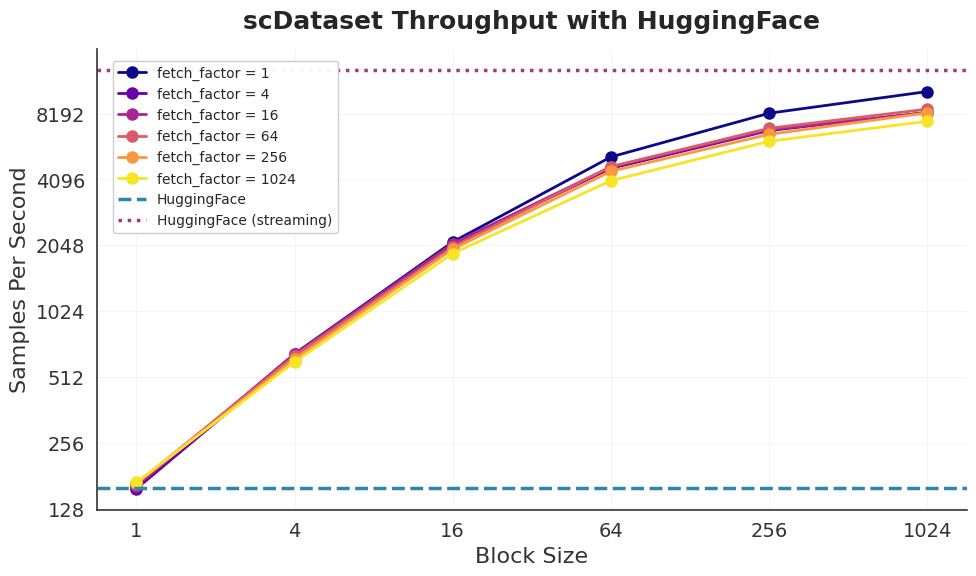

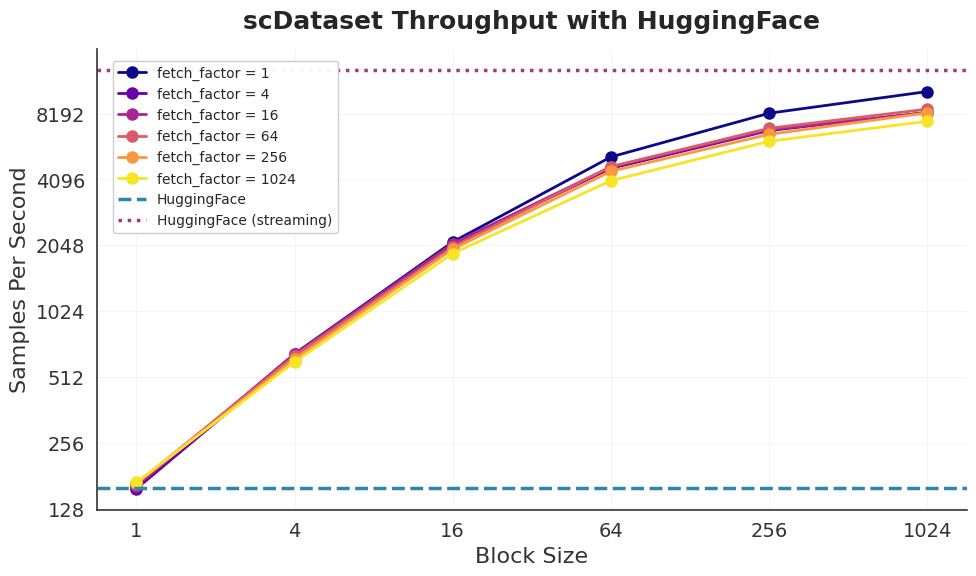

In [3]:
plot_throughput(
    csv_path='experiments/block_size_fetch_factor_eval_huggingface_random.csv',
    title='scDataset Throughput with HuggingFace',
    y_log_scale=True,
    x_log_scale=True,
    color_map='plasma',
    # baseline_label auto-detected as "HuggingFace" based on collection_type
    save_path='figures/throughput_huggingface.pdf',
)

## 3. scDataset Throughput with BioNeMo-SCDL

This plot shows the throughput of scDataset using BioNeMo's
SingleCellMemMapDataset (SCDL) compared to the baseline PyTorch DataLoader.

Figure saved to figures/throughput_bionemo.pdf


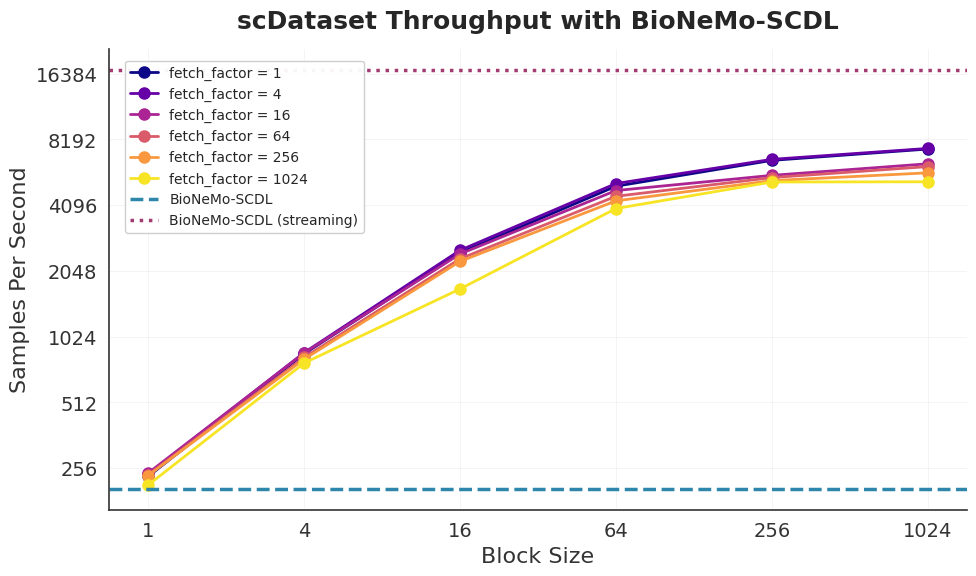

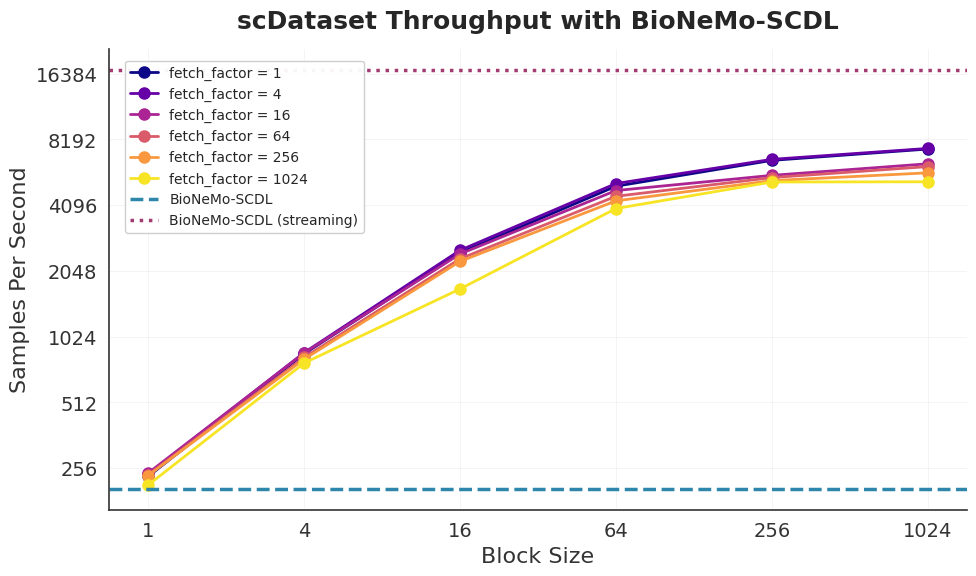

In [4]:
plot_throughput(
    csv_path='experiments/block_size_fetch_factor_eval_bionemo_random.csv',
    title='scDataset Throughput with BioNeMo-SCDL',
    y_log_scale=True,
    x_log_scale=True,
    color_map='plasma',
    # baseline_label auto-detected as "BioNeMo-SCDL" based on collection_type
    save_path='figures/throughput_bionemo.pdf',
)

## 4. Minibatch Entropy Analysis (AnnData)

This plot shows the minibatch entropy (measuring how well samples from different
plates are mixed) for scDataset with different block sizes and fetch factors.
Higher entropy indicates better random mixing.

Note: Batch entropy is only computed for AnnData experiments where we have
the 'plate' metadata to measure cross-source mixing.

Figure saved to figures/batch_entropy_anndata.pdf


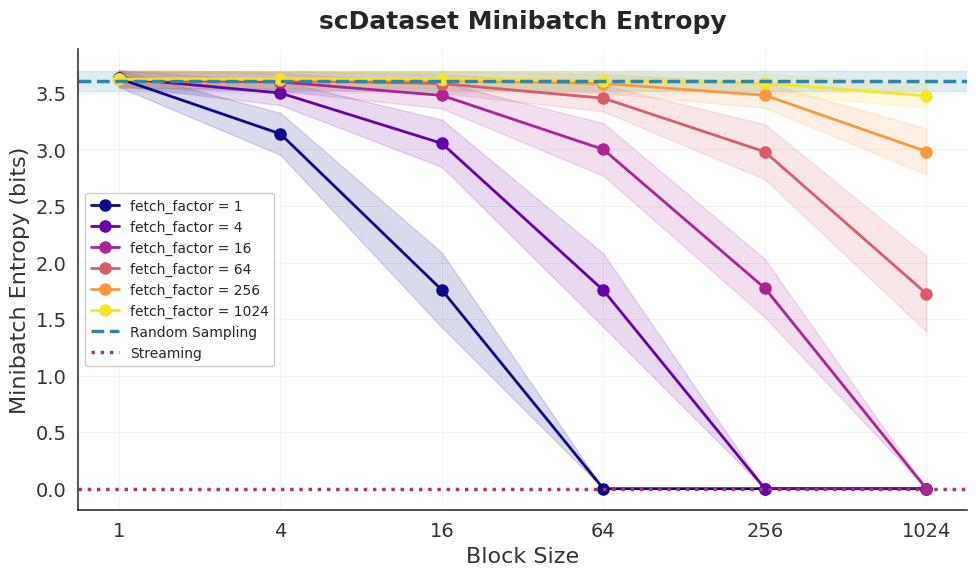

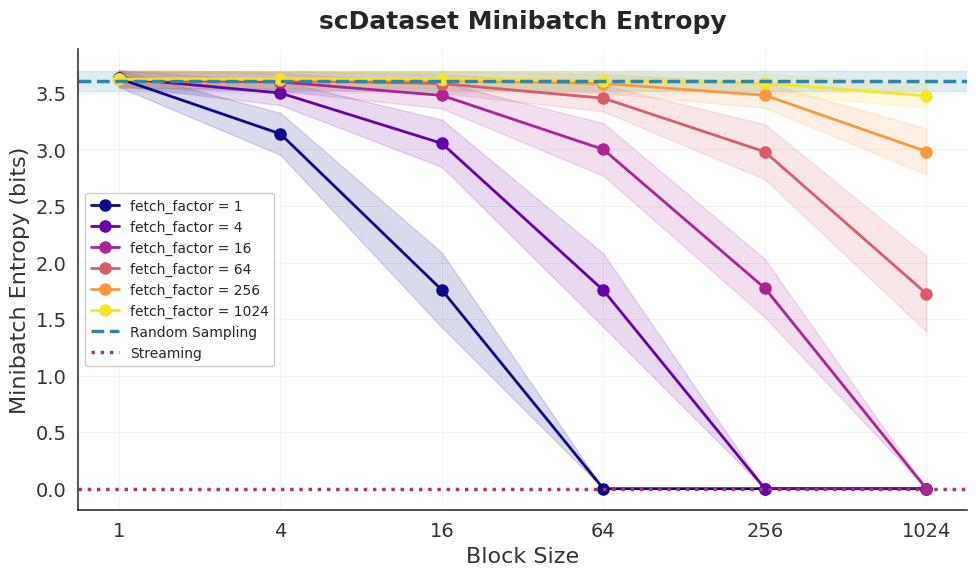

In [5]:
plot_batch_entropy(
    csv_path='experiments/block_size_fetch_factor_eval_anncollection_random.csv',
    title='scDataset Minibatch Entropy',
    baseline_label='Random Sampling',  # Correct label for entropy plot
    color_map='plasma',
    save_path='figures/batch_entropy_anndata.pdf',
)

## 5. Throughput vs Minibatch Entropy Tradeoff

This plot shows the tradeoff between throughput (samples/second) and minibatch entropy
for different block_size and fetch_factor combinations. Each line represents a fixed
fetch_factor, with points connected in order of increasing block_size.

Higher entropy (x-axis) indicates better random mixing, while higher throughput (y-axis)
indicates faster data loading. The ideal is the upper-right corner.

Figure saved to figures/tradeoff_anndata.pdf


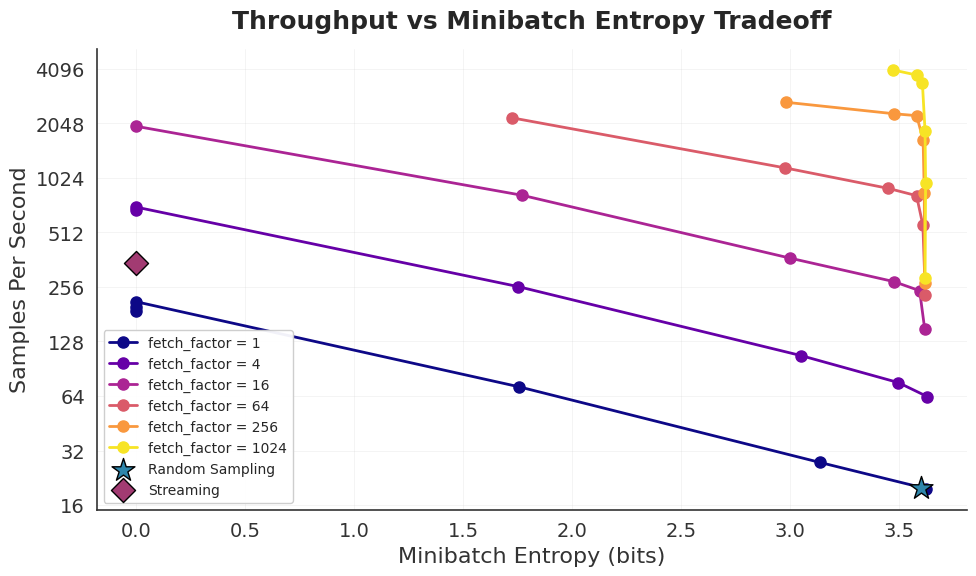

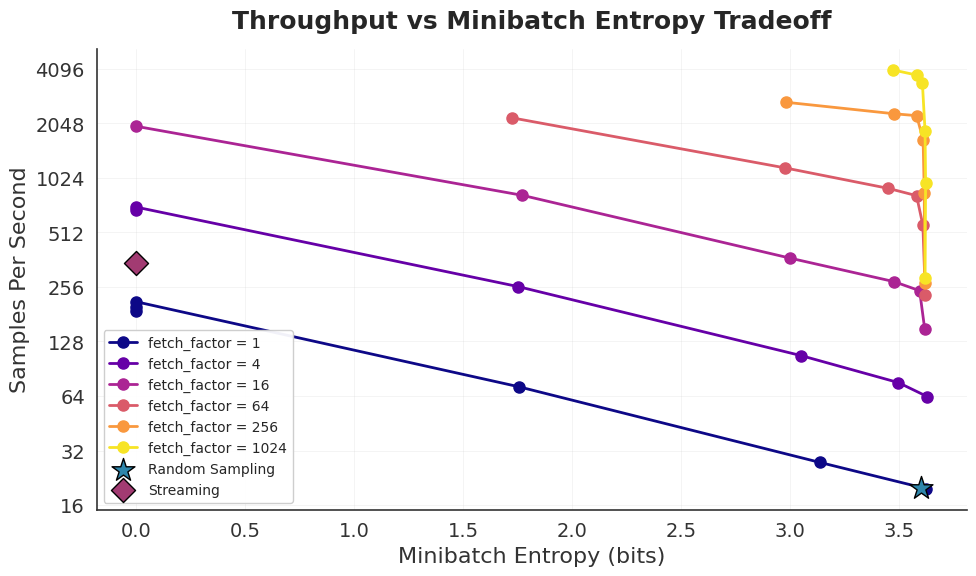

In [6]:
plot_tradeoff(
    csv_path='experiments/block_size_fetch_factor_eval_anncollection_random.csv',
    title='Throughput vs Minibatch Entropy Tradeoff',
    x_scale='linear',  # Options: 'linear', 'log', 'power'
    x_power=1,  # Power exponent (0.5 = sqrt scale)
    y_log_scale=True,
    color_map='plasma',
    save_path='figures/tradeoff_anndata.pdf',
)

## 5b. Tradeoff Scatter Plot (Alternative View)

A scatter plot version of the tradeoff where:
- Color encodes fetch_factor
- Marker size encodes block_size (larger = larger block_size)

Figure saved to figures/tradeoff_scatter_anndata.pdf


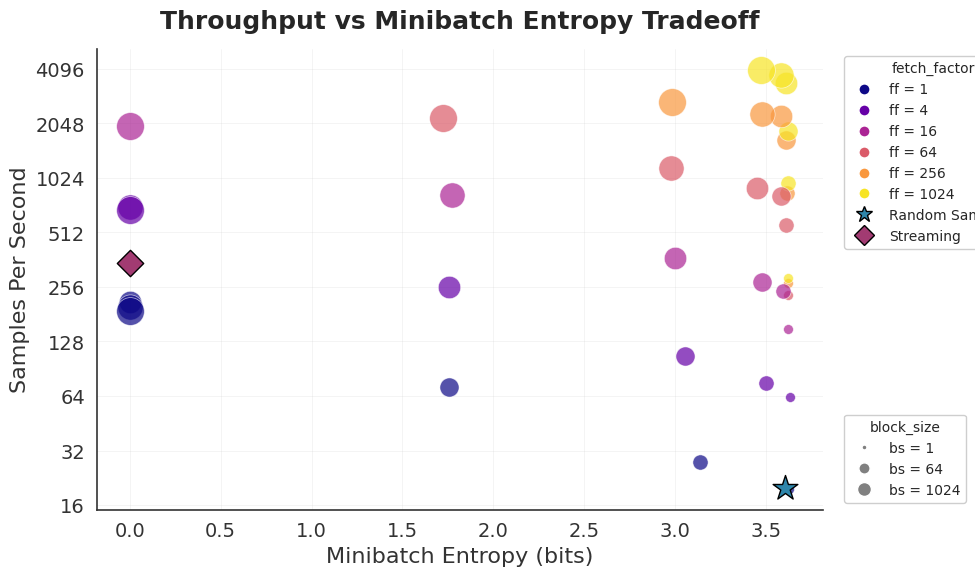

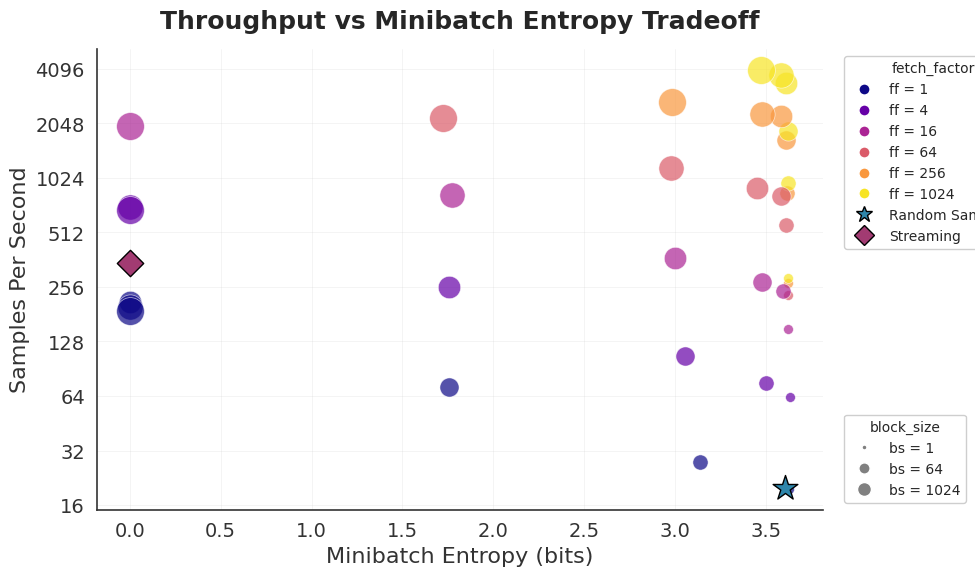

In [7]:
plot_tradeoff_scatter(
    csv_path='experiments/block_size_fetch_factor_eval_anncollection_random.csv',
    title='Throughput vs Minibatch Entropy Tradeoff',
    x_scale='linear',  # Options: 'linear', 'log', 'power'
    x_power=3,
    y_log_scale=True,
    color_map='plasma',
    size_range=(50, 400),  # Min and max marker sizes
    save_path='figures/tradeoff_scatter_anndata.pdf',
)

## Alternative: Using the General-Purpose Function

The `plot_block_size_by_fetch_factor` function is a more flexible option
that can create both throughput and entropy plots.

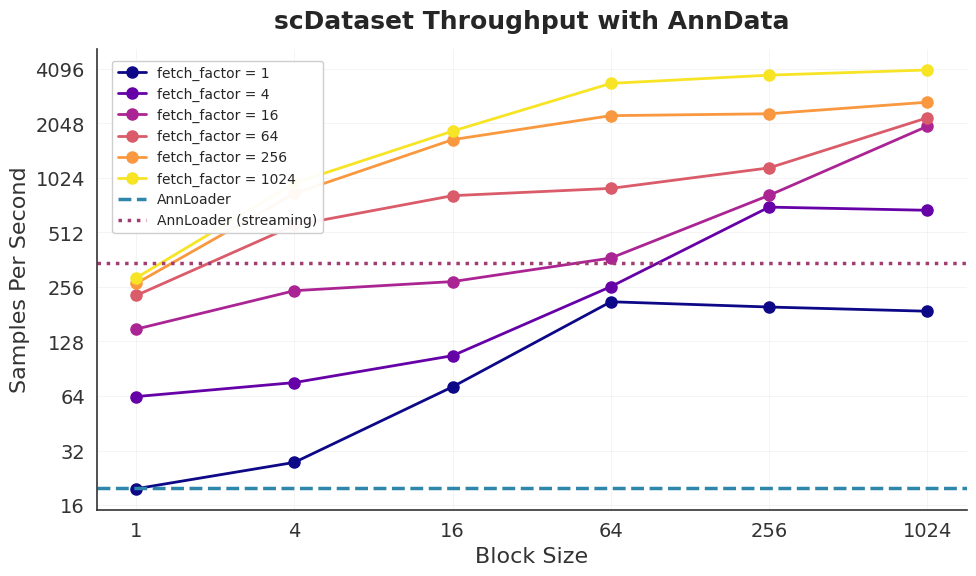

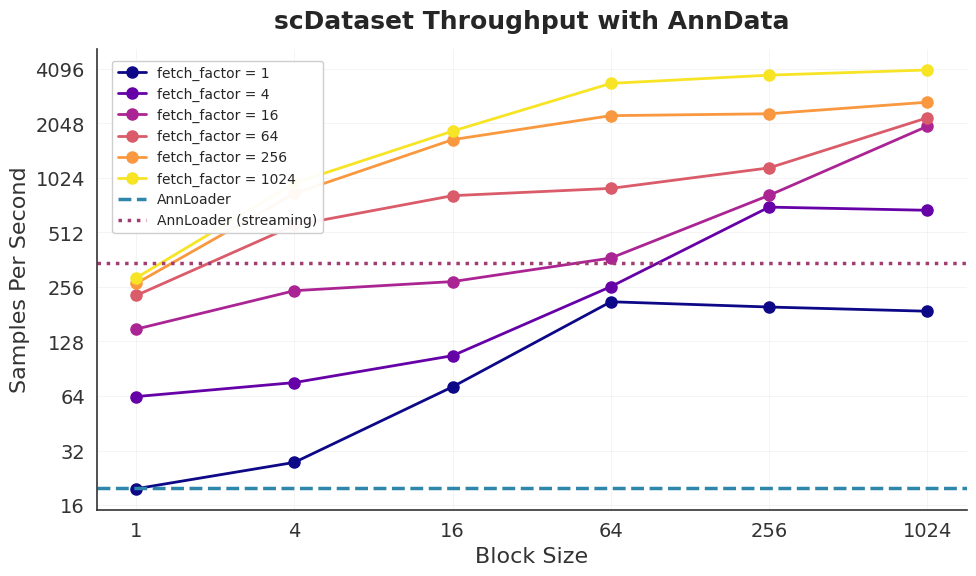

In [8]:
# Throughput plot with the general function
plot_block_size_by_fetch_factor(
    csv_path='experiments/block_size_fetch_factor_eval_anncollection_random.csv',
    y_column='samples_per_second',
    y_label='Samples Per Second',
    plot_title='scDataset Throughput with AnnData',
    y_log_scale=True,
    x_log_scale=True,
    color_map='plasma',
    # baseline_label auto-detected as "AnnLoader" based on collection_type
)

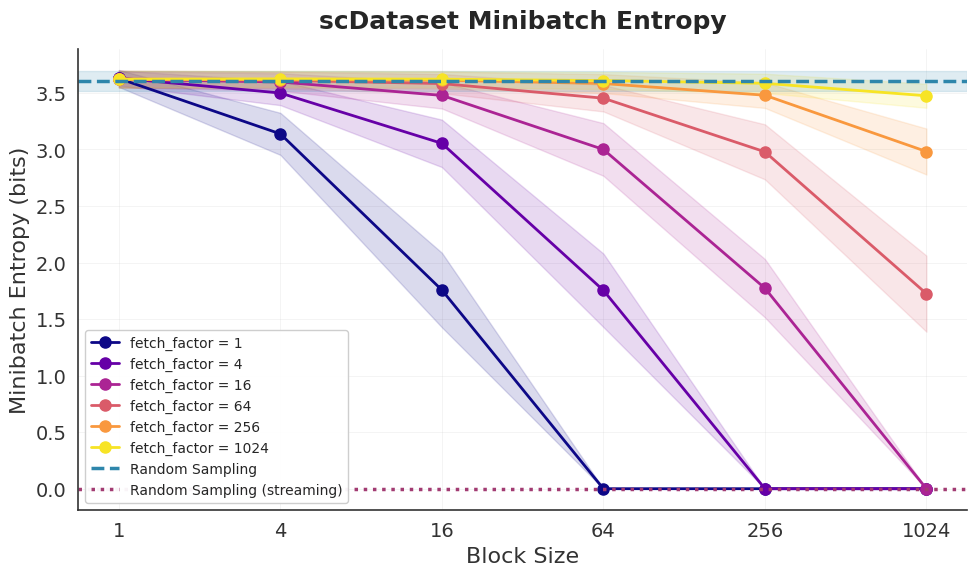

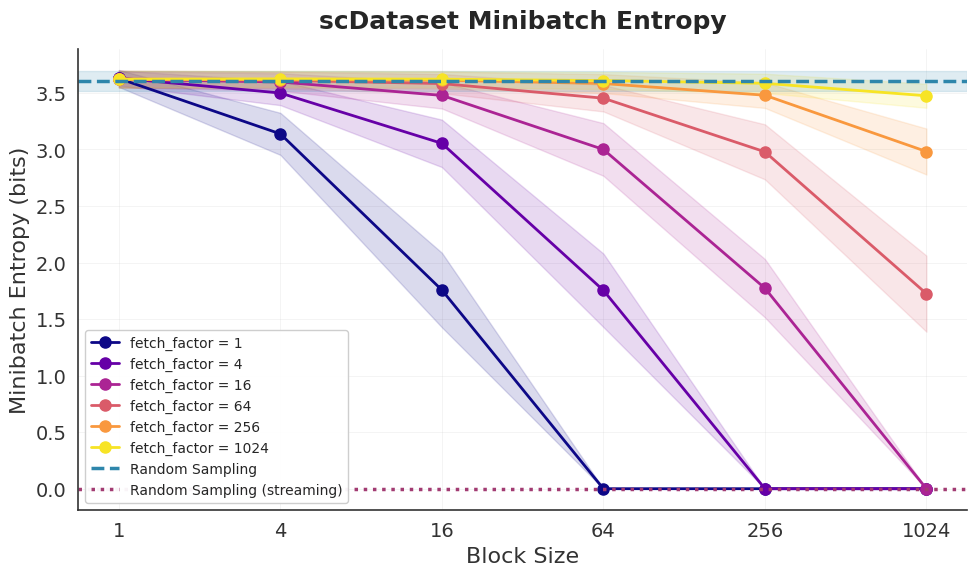

In [9]:
# Entropy plot with error bands
plot_block_size_by_fetch_factor(
    csv_path='experiments/block_size_fetch_factor_eval_anncollection_random.csv',
    y_column='avg_batch_entropy',
    y_label='Minibatch Entropy (bits)',
    plot_title='scDataset Minibatch Entropy',
    include_error_bars=True,
    error_column='std_batch_entropy',
    x_log_scale=True,
    color_map='plasma',
    baseline_label='Random Sampling',  # Correct label for entropy plot
)

## 6. Streaming Throughput Comparison

This bar plot compares the streaming throughput of AnnLoader vs scDataset with different fetch_factor values. Streaming mode processes data sequentially without shuffling.

Figure saved to figures/streaming_comparison.pdf


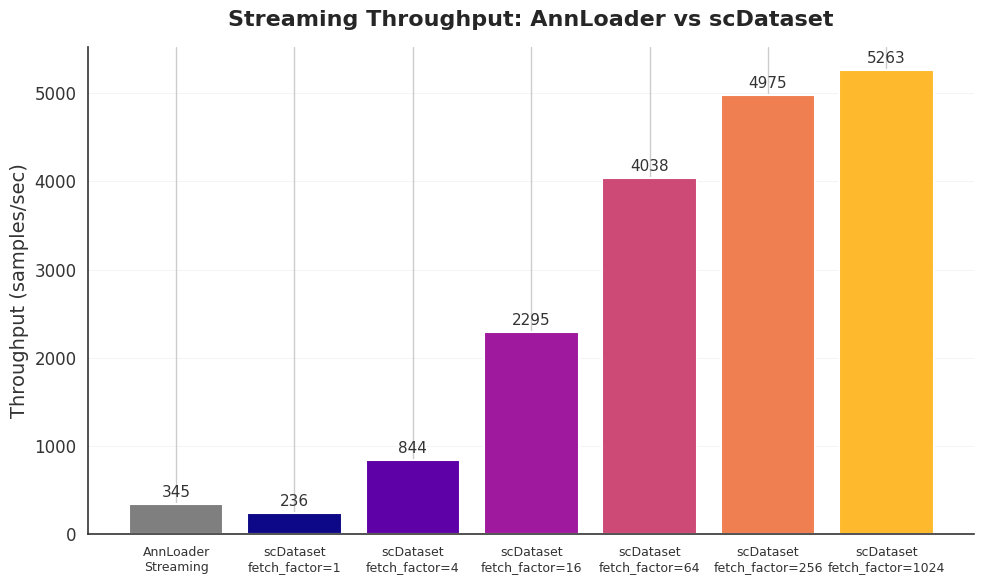

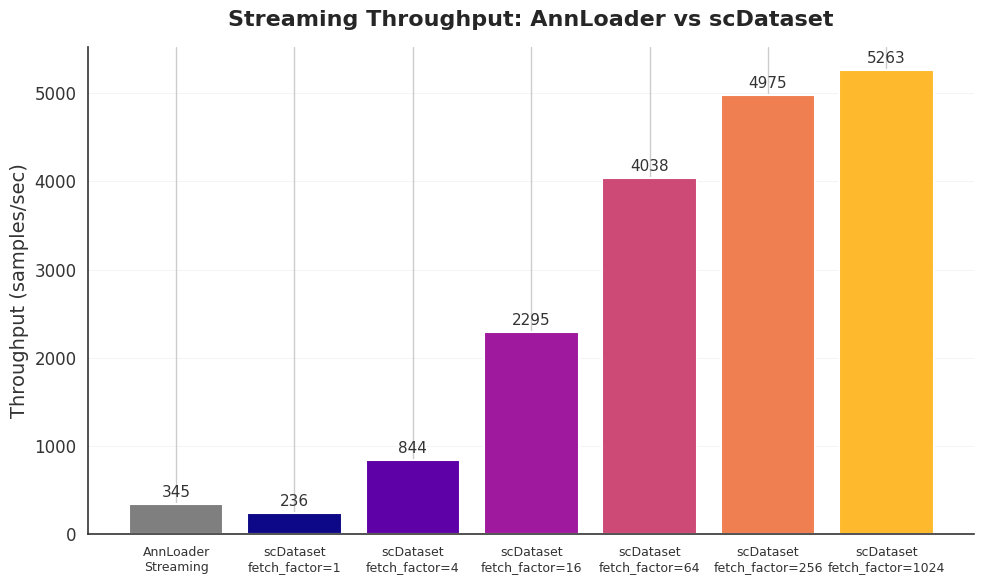

In [10]:
plot_streaming_comparison(
    csv_path='experiments/block_size_fetch_factor_eval_anncollection_random.csv',
    title='Streaming Throughput: AnnLoader vs scDataset',
    save_path='figures/streaming_comparison.pdf',
)

## Generate All Plots at Once

Use this to generate all standard benchmark plots and save them to the figures directory.


Generating plots for AnnData...
Figure saved to figures/throughput_anndata.pdf
Figure saved to figures/batch_entropy_anndata.pdf
Figure saved to figures/tradeoff_anndata.pdf

Generating plots for HuggingFace...
Figure saved to figures/throughput_huggingface.pdf

Generating plots for BioNeMo...
Figure saved to figures/throughput_bionemo.pdf

All plots saved to figures/


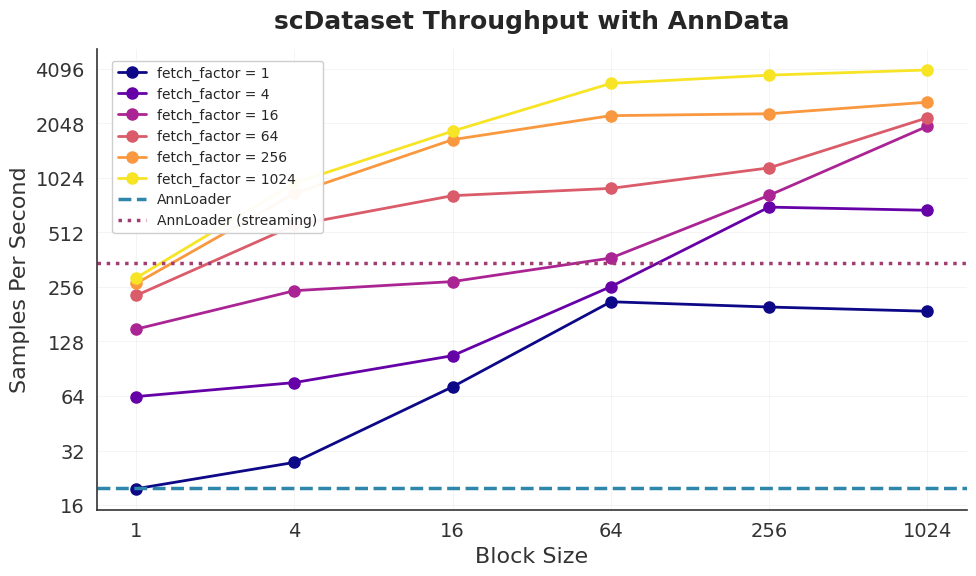

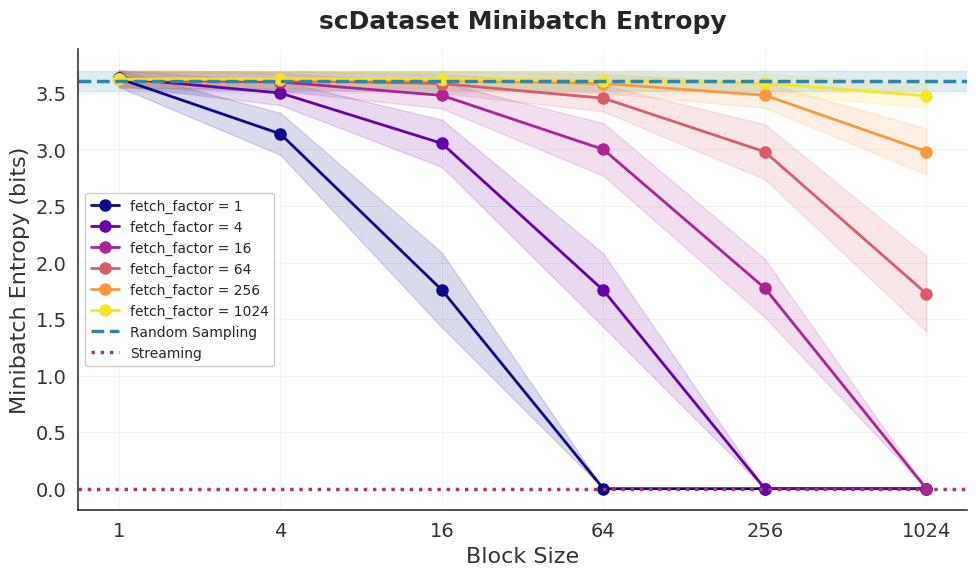

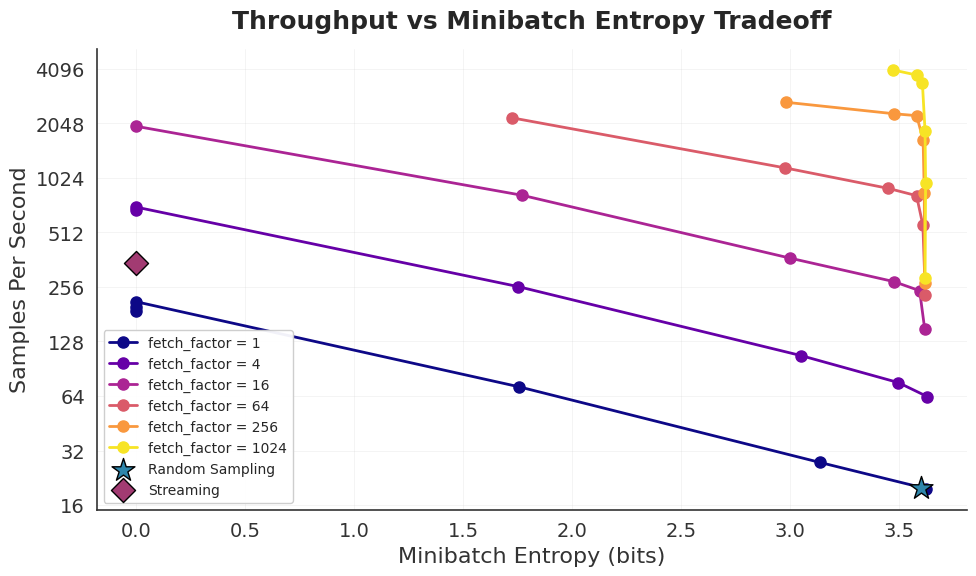

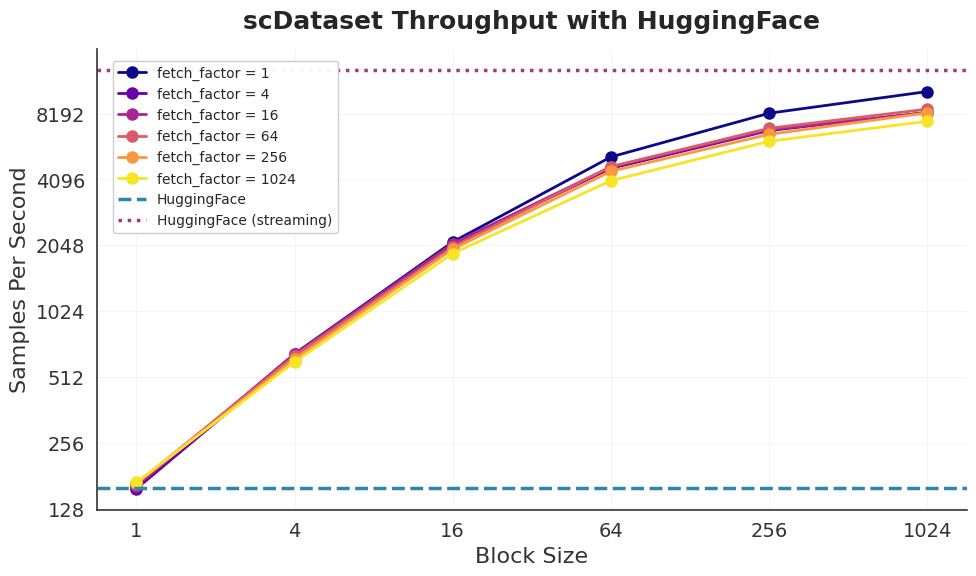

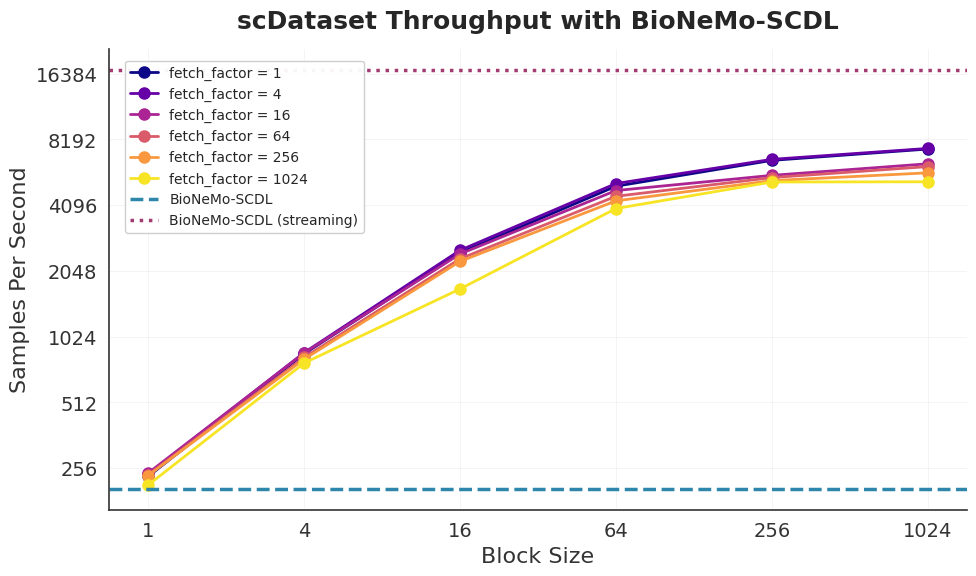

In [11]:
# Generate all plots and save to figures/
generate_all_benchmark_plots(
    experiments_dir='experiments',
    figures_dir='figures'
)